# Simple 1D Kernel Density Estimation

Adapted from http://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html

The PCA does an unsupervised dimensionality reduction, while the logistic regression does the prediction.

We use a GridSearchCV to set the dimensionality of the PCA

In [1]:
# Original Python Author: Jake Vanderplas <jakevdp@cs.washington.edu>

using ScikitLearn, PyPlot
using Distributions

@sk_import neighbors: KernelDensity

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in transpose(::Ptr{

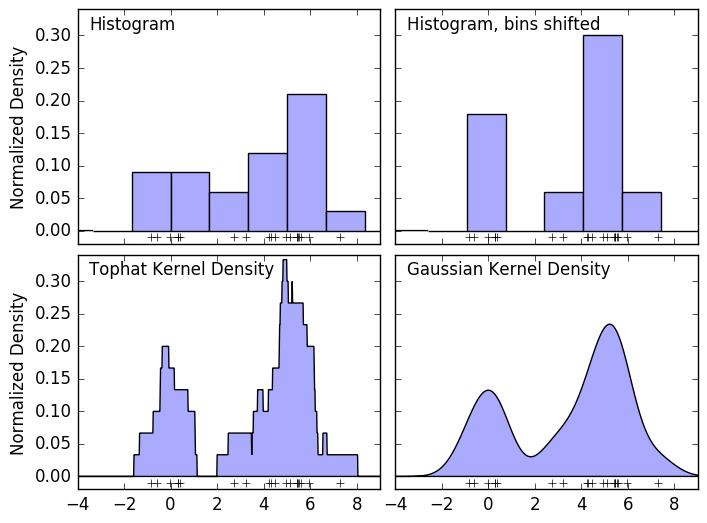

In [2]:
#----------------------------------------------------------------------
# Plot the progression of histograms to kernels
srand(1)
N = 20
X = hcat(vcat(randn(round(Int, 0.3 * N)),
              randn(round(Int, 0.7 * N))+5))
X_plot = hcat(linspace(-5, 10, 1000))
bins = linspace(-5, 10, 10)

fig, ax = plt[:subplots](2, 2, sharex=true, sharey=true)
fig[:subplots_adjust](hspace=0.05, wspace=0.05)

# histogram 1
ax[1, 1][:hist](X[:, 1], bins=bins, fc="#AAAAFF", normed=true)
ax[1, 1][:text](-3.5, 0.31, "Histogram")

# histogram 2
ax[1, 2][:hist](X[:, 1], bins=bins + 0.75, fc="#AAAAFF", normed=true)
ax[1, 2][:text](-3.5, 0.31, "Histogram, bins shifted")

# tophat KDE
kde = fit!(KernelDensity(kernel="tophat", bandwidth=0.75), X)
log_dens = score_samples(kde, X_plot)
ax[2, 1][:fill](X_plot[:, 1], exp.(log_dens), fc="#AAAAFF")
ax[2, 1][:text](-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = fit!(KernelDensity(kernel="gaussian", bandwidth=0.75), X)
log_dens = score_samples(kde, X_plot)
ax[2, 2][:fill](X_plot[:, 1], exp.(log_dens), fc="#AAAAFF")
ax[2, 2][:text](-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax[:]
    axi[:plot](X[:, 1], zeros(size(X,1)) - 0.01, "+k")
    axi[:set_xlim](-4, 9)
    axi[:set_ylim](-0.02, 0.34)
end

for axi in ax[:, 1]
    axi[:set_ylabel]("Normalized Density")
end

for axi in ax[1, :]
    axi[:set_xlabel]("x")
end

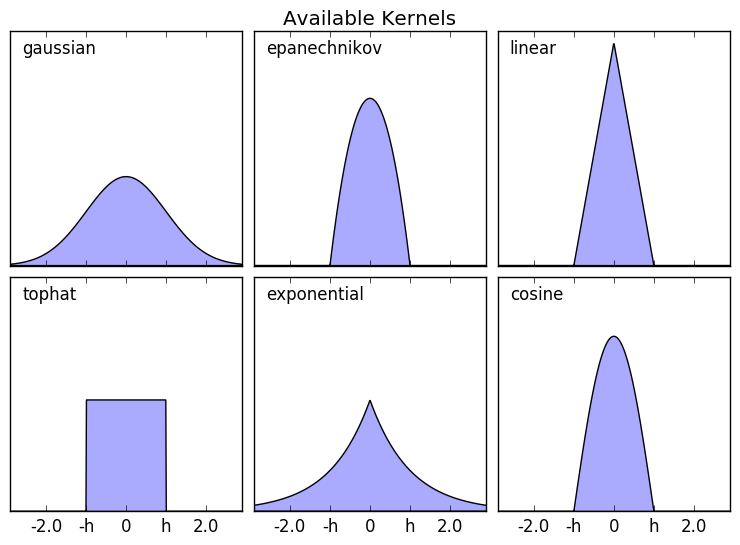

PyObject <matplotlib.text.Text object at 0x32d0e8390>

In [3]:
#----------------------------------------------------------------------
# Plot all available kernels
X_plot = hcat(linspace(-6, 6, 1000))
X_src = zeros(1, 1)

fig, ax = plt[:subplots](2, 3, sharex=true, sharey=true)
fig[:subplots_adjust](left=0.05, right=0.95, hspace=0.05, wspace=0.05)


function format_func(x, loc)
    if x == 0
        return "0"
    elseif x == 1
        return "h"
    elseif x == -1
        return "-h"
    else
        return string(x)
    end
end

for (i, kernel) in enumerate(["gaussian", "tophat", "epanechnikov",
                              "exponential", "linear", "cosine"])
    axi = ax[i]
    log_dens = score_samples(fit!(KernelDensity(kernel=kernel), X_src), X_plot)
    axi[:fill](X_plot[:, 1], exp.(log_dens), "-k", fc="#AAAAFF")
    axi[:text](-2.6, 0.95, kernel)

    axi[:xaxis][:set_major_formatter](plt[:FuncFormatter](format_func))
    axi[:xaxis][:set_major_locator](plt[:MultipleLocator](1))
    axi[:yaxis][:set_major_locator](plt[:NullLocator]())

    axi[:set_ylim](0, 1.05)
    axi[:set_xlim](-2.9, 2.9)
end


ax[1, 2][:set_title]("Available Kernels")

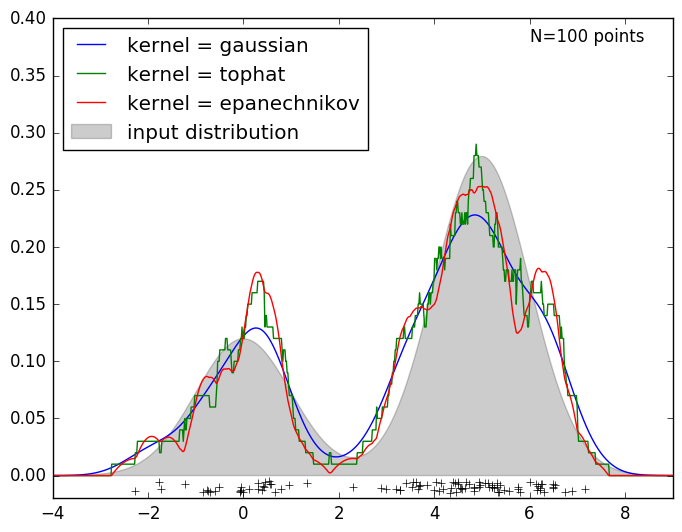

(-0.02,0.4)

In [4]:
#----------------------------------------------------------------------
# Plot a 1D density example
N = 100

srand(1)
X = hcat(vcat(randn(round(Int, 0.3 * N)),
              randn(round(Int, 0.7 * N))+5))
X_plot = hcat(linspace(-5, 10, 1000))

true_dens = (0.3 * pdf(Normal(0, 1), X_plot[:, 1])
            + 0.7 * pdf(Normal(5, 1), X_plot[:, 1]))

fig, ax = plt[:subplots]()
ax[:fill](X_plot[:, 1], true_dens, fc="black", alpha=0.2,
          label="input distribution")

for kernel in ["gaussian", "tophat", "epanechnikov"]
    kde = fit!(KernelDensity(kernel=kernel, bandwidth=0.5), X)
    log_dens = score_samples(kde, X_plot)
    ax[:plot](X_plot[:, 1], exp.(log_dens), "-",
              label="kernel = $kernel")
end

ax[:text](6, 0.38, "N=$N points")

ax[:legend](loc="upper left")
ax[:plot](X[:, 1], -0.005 - 0.01 * rand(size(X, 1)), "+k")

ax[:set_xlim](-4, 9)
ax[:set_ylim](-0.02, 0.4)